# <center> CNN 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Get Data

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train[..., np.newaxis] / 255.0


def filter_pair(x, y, a, b):
    keep = (y == a) | (y == b)
    x, y = x[keep], y[keep]
    y = y == a
    return x, y


x_train, y_train = filter_pair(x_train, y_train, 1, 5)  # classify 1, 5 only
x_train_small = tf.image.resize(x_train, (4, 4)).numpy()
x_train_bin = np.array(x_train_small > 0.5, dtype=np.float32)  # binary input
x_train_bin = np.squeeze(x_train_bin)[:10000]

# tensorflow data
x_train_tf = tf.reshape(tf.constant(x_train_bin, dtype=tf.float64), [-1, 4, 4, 1])
y_train_tf = tf.constant(y_train[:10000], dtype=tf.float64)

## CNN model

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (2,2), padding='same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(5, (2,2), padding='same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(1,1)),
    tf.keras.layers.Dense(2, activation="relu"),
    tf.keras.layers.Dense(1, activation="relu")
    ])

## train

In [4]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.005),
    metrics=[tf.keras.metrics.BinaryAccuracy()],
)

history = model.fit(x_train_tf, y_train_tf, batch_size=100, epochs=30, shuffle=True)

Epoch 1/30
100/100 [==============================] - 9s 4ms/step - loss: 0.7847 - binary_accuracy: 0.5323
Epoch 2/30
100/100 [==============================] - 0s 4ms/step - loss: 0.6877 - binary_accuracy: 0.5551
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 0.6876 - binary_accuracy: 0.5569
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 0.6880 - binary_accuracy: 0.5530
Epoch 5/30
100/100 [==============================] - 0s 4ms/step - loss: 0.6884 - binary_accuracy: 0.5543
Epoch 6/30
100/100 [==============================] - 0s 5ms/step - loss: 0.6887 - binary_accuracy: 0.5523
Epoch 7/30
100/100 [==============================] - 1s 5ms/step - loss: 0.6876 - binary_accuracy: 0.5573
Epoch 8/30
100/100 [==============================] - 1s 5ms/step - loss: 0.6875 - binary_accuracy: 0.5581
Epoch 9/30
100/100 [==============================] - 1s 5ms/step - loss: 0.6875 - binary_accuracy: 0.5581
Epoch 10/30
100/100 [================

## plot

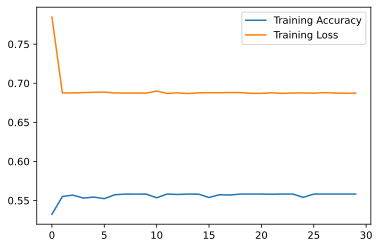

In [5]:
acc = history.history['binary_accuracy']
loss = history.history['loss']

plt.plot(acc, label='Training Accuracy')
plt.plot(loss, label='Training Loss')
plt.legend()
plt.show()